In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot as plt
import numpy as np

In [2]:
num_words = 10000

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [4]:
print(f'Train Size => {len(X_train)}')
print(f'Test Size => {len(X_test)}')

Train Size => 25000
Test Size => 25000


In [5]:
#hyperprometer
max_len = 256
embedding_size = 32
batch_size = 128
pad_type = 'post'

In [6]:
X_train_pad = pad_sequences(X_train,
                            maxlen=max_len,
                            padding=pad_type,
                            truncating=pad_type,)
X_test_pad = pad_sequences(X_test,
                            maxlen=max_len,
                            padding=pad_type,
                            truncating=pad_type,)

In [7]:
model1 = Sequential()

In [8]:
model1.add(Embedding(input_dim=num_words,
                   output_dim=embedding_size,
                   input_length=max_len,
                   name='layer_embedding',))
model1.add(Flatten())
model1.add(Dense(250,
               activation='relu',))
model1.add(Dropout(0.5))
model1.add(Dense(1,
               activation='sigmoid',))

In [9]:
model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 256, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               2048250   
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 2,368,501
Trainable params: 2,368,501
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
history = model1.fit(X_train_pad, y_train,
         epochs=5,
         validation_data=(X_test_pad, y_test),
          batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 9s 44ms/step - loss: 0.4834 - acc: 0.7424 - val_loss: 0.3235 - val_acc: 0.8604
Epoch 2/5
196/196 [==============================] - 8s 42ms/step - loss: 0.1704 - acc: 0.9366 - val_loss: 0.3765 - val_acc: 0.8438
Epoch 3/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0345 - acc: 0.9921 - val_loss: 0.4898 - val_acc: 0.8449
Epoch 4/5
196/196 [==============================] - 8s 41ms/step - loss: 0.0052 - acc: 0.9999 - val_loss: 0.5547 - val_acc: 0.8498
Epoch 5/5
196/196 [==============================] - 8s 40ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5984 - val_acc: 0.8477
Wall time: 41.6 s


In [12]:
%%time
eval_ = model1.evaluate(X_test_pad, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.5984 - acc: 0.8477
Wall time: 2.94 s


In [13]:
print('Loss => {0:.3}'.format(eval_[0]))
print('Accuracy => {0:.3%}'.format(eval_[1]))

Loss => 0.598
Accuracy => 84.772%


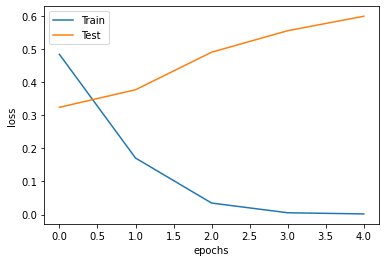

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

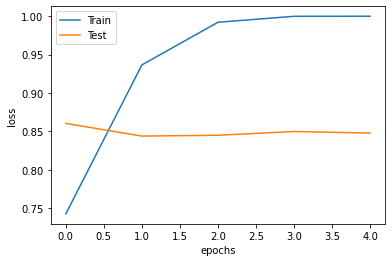

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['Train', 'Test'])

In [23]:
model2 = Sequential()

In [24]:
embedding_size = 16
model2.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_len,
                    ))
model2.add(Flatten())
model2.add(Dense(64,
                activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,
                activation='sigmoid'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 422,273
Trainable params: 422,273
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
            metrics=['acc'])

In [27]:
history2 = model2.fit(X_train_pad, y_train,
                     validation_data=(X_test_pad, y_test),
                     epochs=5,
                     batch_size=32)

Epoch 1/5
782/782 [==============================] - 5s 6ms/step - loss: 0.4432 - acc: 0.7765 - val_loss: 0.3276 - val_acc: 0.8594
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.1850 - acc: 0.9329 - val_loss: 0.3722 - val_acc: 0.8528
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.0557 - acc: 0.9835 - val_loss: 0.5162 - val_acc: 0.8388
Epoch 4/5
782/782 [==============================] - 5s 6ms/step - loss: 0.0141 - acc: 0.9968 - val_loss: 0.6461 - val_acc: 0.8428
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.0065 - acc: 0.9989 - val_loss: 0.7660 - val_acc: 0.8392


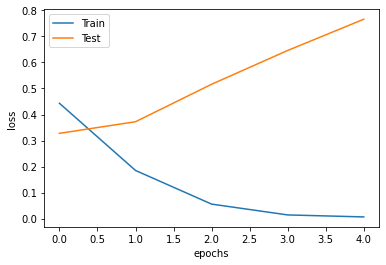

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])

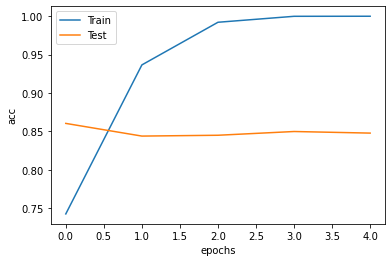

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['Train', 'Test'])